# Importation des librairies

In [128]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

In [2]:
pd.set_option("display.max_rows", 130)
pd.set_option('max_colwidth', 250)

# Importation des données

In [146]:
data = pd.read_csv("data/application_train.csv")

In [147]:
target = data.pop("TARGET") 
X_data = data.copy()

# Analyse des valeurs manquantes

In [148]:
target.isna().sum()

0

In [149]:
target.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

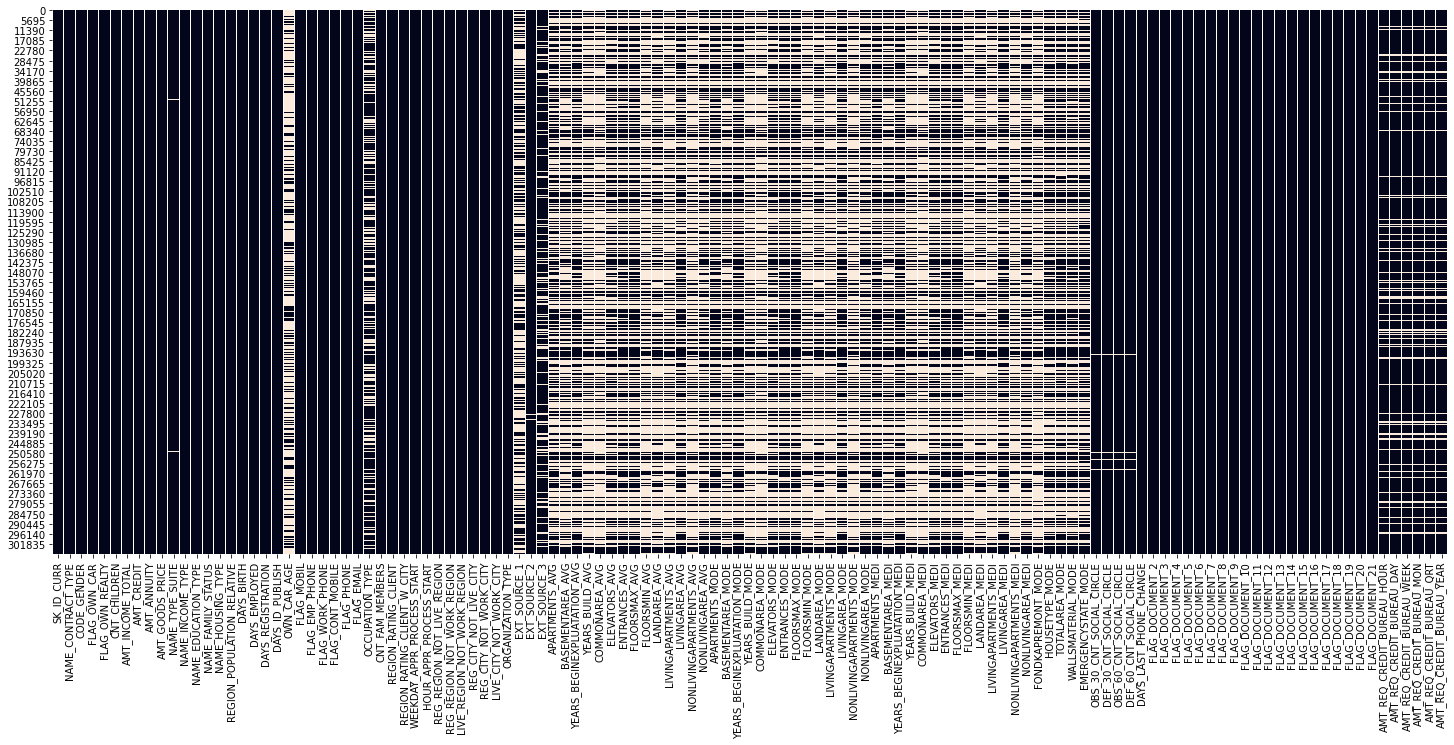

In [6]:
plt.figure(figsize=(25,10))
sns.heatmap(X_data.isna(), cbar=False)
plt.show()

In [7]:
miss_data_rate = round(X_data.isna().sum() / X_data.shape[0],3).sort_values(ascending=False)

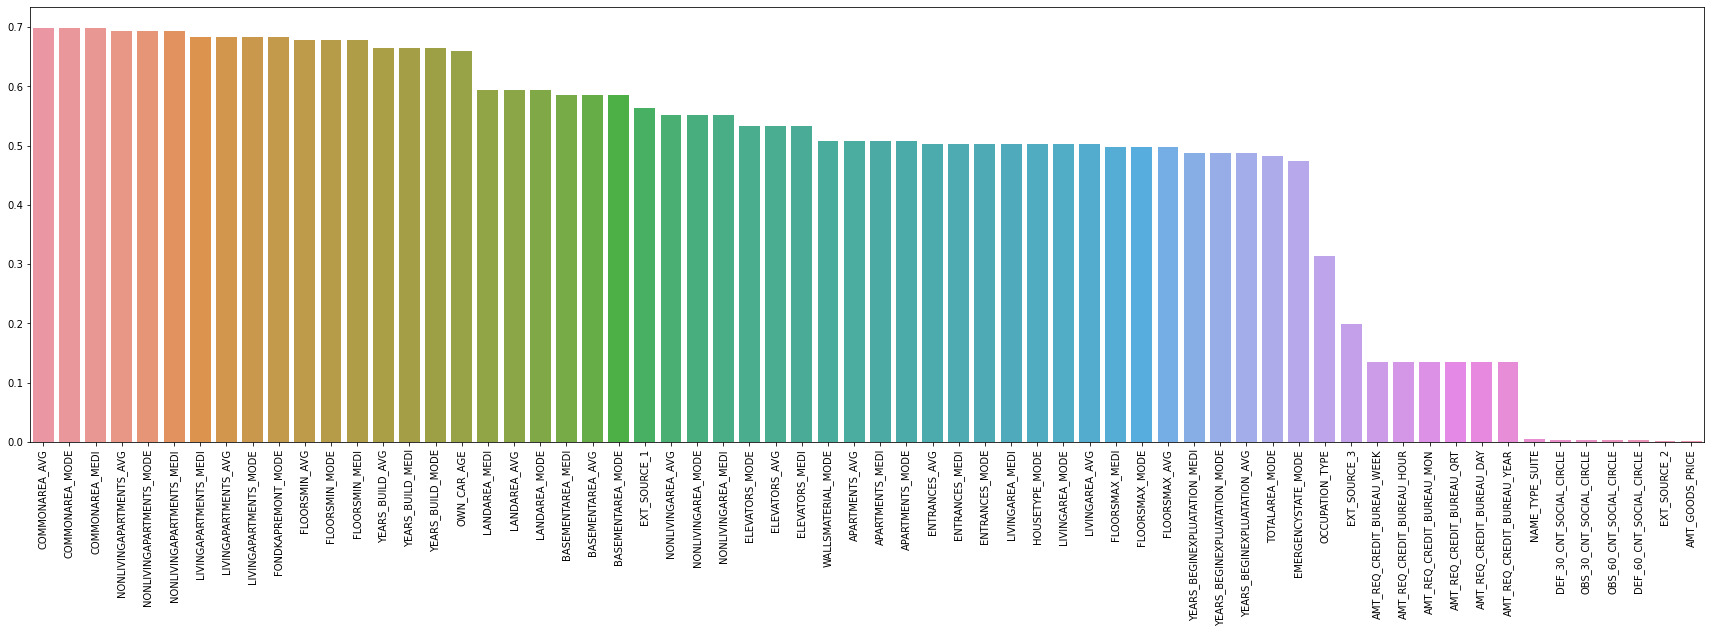

In [8]:
plt.figure(figsize=(30,8))
sns.barplot(x=miss_data_rate[miss_data_rate > 0].index, y=miss_data_rate[miss_data_rate > 0].values)
plt.xticks(rotation=90)
plt.show()

## Suppression des colonnes avec plus de 40% de valeurs manquantes

In [9]:
rate = 0.4

In [10]:
X_data = X_data[miss_data_rate[miss_data_rate < rate].index]

In [11]:
# pourcentage des valeurs manquantes total
X_data.isna().sum().sum() / X_data.size

0.01864427433309522

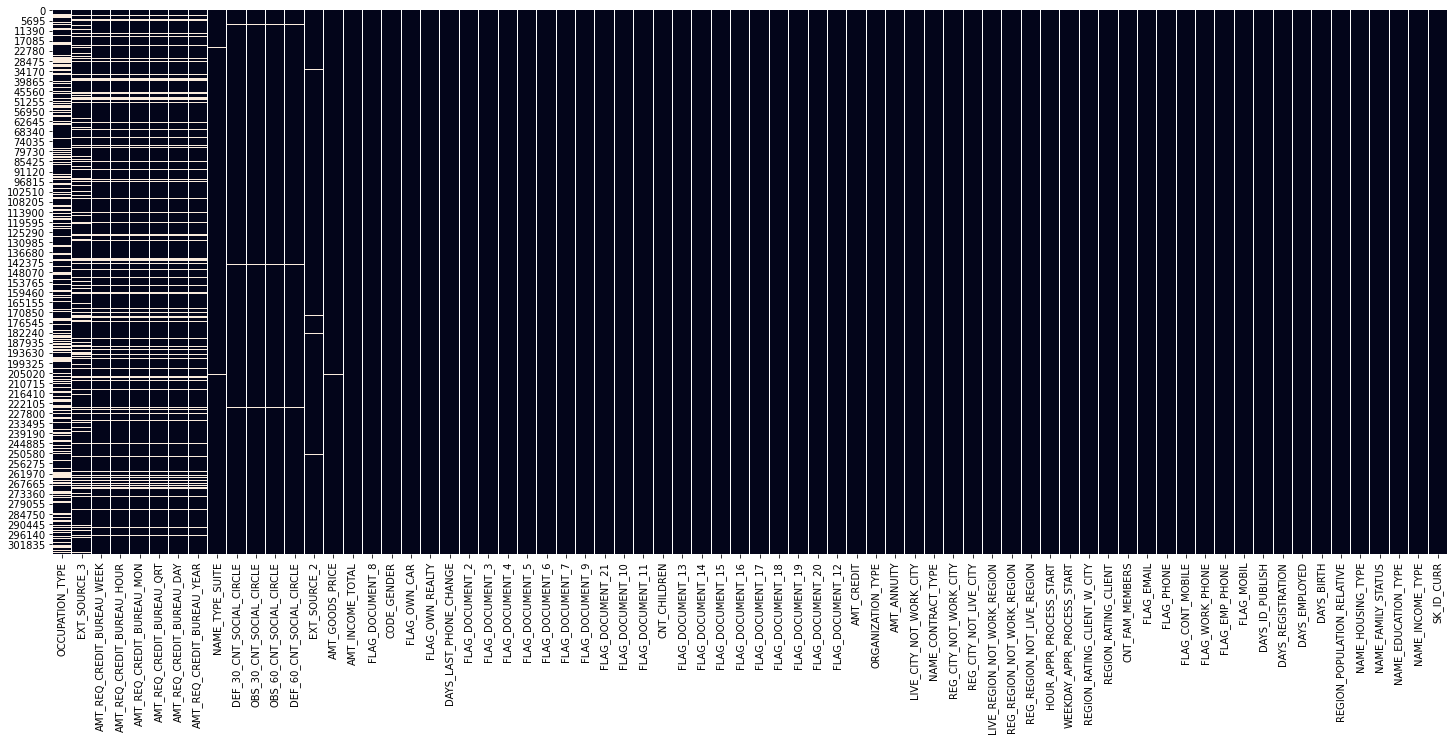

In [12]:
plt.figure(figsize=(25,10))
sns.heatmap(X_data.isna(), cbar=False)
plt.show()

## Suppression des score EXT

In [13]:
pd.concat([X_data.EXT_SOURCE_2, target], axis=1).corr()

,EXT_SOURCE_2,TARGET
EXT_SOURCE_2,1.000000,-0.160472
TARGET,-0.160472,1.000000


In [14]:
ext_source_col = X_data.columns[X_data.columns.str.contains("EXT_SOURCE")]

In [15]:
X_data.drop(ext_source_col, axis=1, inplace=True)

## Suppression des Flag doc

In [16]:
flag_docs_col = [f"FLAG_DOCUMENT_{i}" for i in range(2,22)]

In [17]:
X_data.drop(flag_docs_col, axis=1, inplace=True)

In [18]:
X_data["AMT_REQ_CREDIT_BUREAU_WEEK"].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [19]:
X_data["AMT_REQ_CREDIT_BUREAU_WEEK"].isna().sum()

41519

In [20]:
amt_req_bur = X_data.columns[X_data.columns.str.contains("AMT_REQ_CREDIT_BUREAU")]

In [21]:
X_data[amt_req_bur].T.isna().all().sum()

41519

<AxesSubplot:>

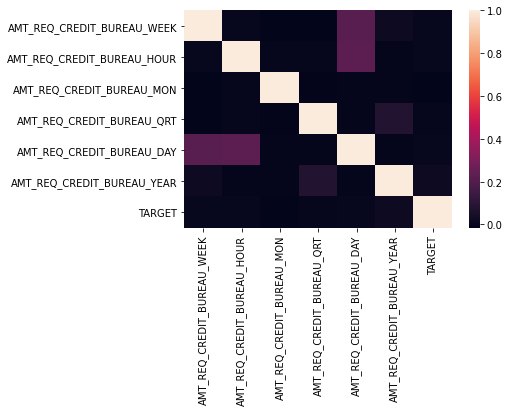

In [22]:
sns.heatmap(pd.concat([X_data[amt_req_bur], target], axis=1).corr())

In [23]:
num_col = X_data.select_dtypes(np.number).columns

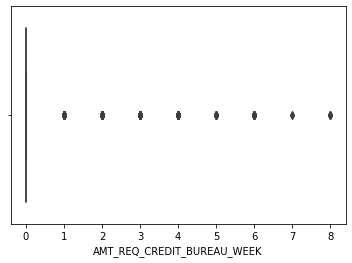

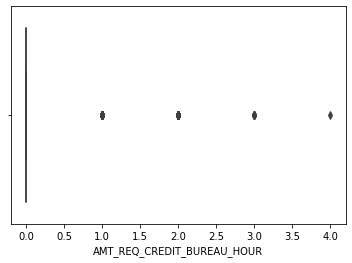

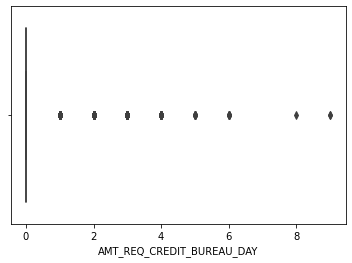

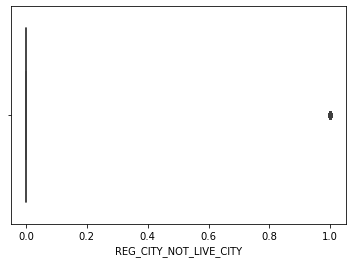

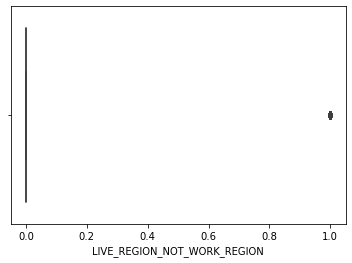

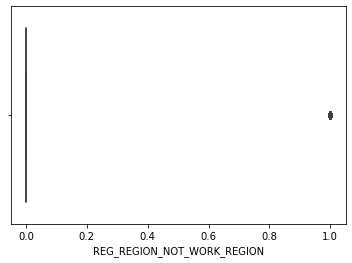

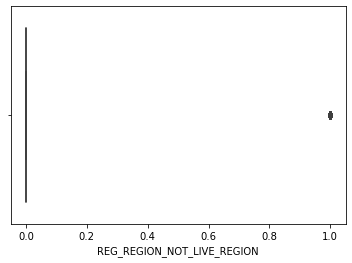

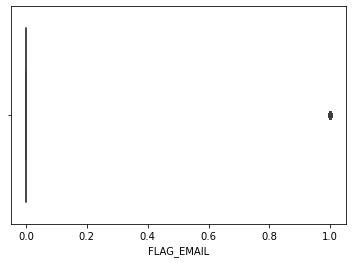

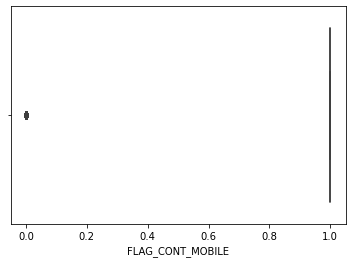

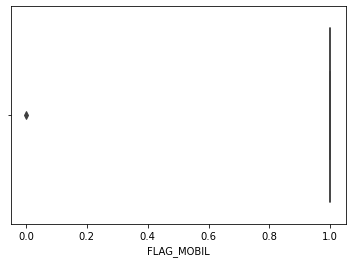

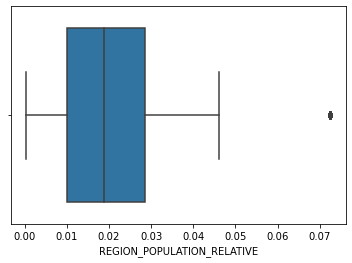

In [24]:
col_under_var = []
for col in X_data[X_data[num_col].columns[X_data[num_col].var() < 0.1]]:
    sns.boxplot(x=X_data[col])
    col_under_var.append(col)
    plt.show()

### Suppression des colonnes avec moins de 0.1 de variance à l'exception de REGION_POPULATION_RELATIVE

In [25]:
X_data.drop(col_under_var[:-1], axis=1, inplace= True)

In [26]:
cat_col = X_data.select_dtypes("object").columns

In [27]:
for col in X_data[cat_col]:
    print(col)
    print(X_data[col].unique(), "\n")

OCCUPATION_TYPE
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff'] 

NAME_TYPE_SUITE
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people'] 

CODE_GENDER
['M' 'F' 'XNA'] 

FLAG_OWN_CAR
['N' 'Y'] 

FLAG_OWN_REALTY
['Y' 'N'] 

ORGANIZATION_TYPE
['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employed'
 'Transport: type 2' 'Construction' 'Housing' 'Kindergarten'
 'Trade: type 7' 'Industry: type 11' 'Military' 'Services'
 'Security Ministries' 'Transport: type 4' 'Industry: type 1' 'Emergency'
 'Security' 'Trade: type 2' 'University' 'Transport: type 3' 'Police'
 'Business Entity Type 1' 'Postal' 'Industry: type 4' 'Agriculture

### changer les valeurs "XNA" en np.nan

In [28]:
X_data.replace(["XNA", "Unknown"], np.nan, inplace=True)

In [29]:
for col in X_data[cat_col]:
    print(col)
    print(X_data[col].value_counts(dropna=False), "\n")

OCCUPATION_TYPE
NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64 

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64 

CODE_GENDER
F      202448
M      105059
NaN         4
Name: CODE_GENDER, dtype: int64 

FLAG_OW

In [30]:
X_data.columns

Index(['OCCUPATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'NAME_TYPE_SUITE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'DAYS_LAST_PHONE_CHANGE', 'CNT_CHILDREN', 'AMT_CREDIT',
       'ORGANIZATION_TYPE', 'AMT_ANNUITY', 'LIVE_CITY_NOT_WORK_CITY',
       'NAME_CONTRACT_TYPE', 'REG_CITY_NOT_WORK_CITY',
       'HOUR_APPR_PROCESS_START', 'WEEKDAY_APPR_PROCESS_START',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'CNT_FAM_MEMBERS', 'FLAG_PHONE', 'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE',
       'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'DAYS_BIRTH',
       'REGION_POPULATION_RELATIVE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'SK_ID_CURR'],
      dtype='obje

### Suppression des NaN dans les colonnes GENDER et NAME_FAMILY_STATUE

In [31]:
X_data.dropna(subset=["CODE_GENDER", "NAME_FAMILY_STATUS"], inplace=True)

### Regrouper ORGANIZATION_TYPE

In [32]:
def func_drop_type(t):
    if "Type" in str(t):
        return t[:-7]
    elif "type" in str(t):
        return t.split(":")[0]
    else:
        return t

In [33]:
X_data["ORGANIZATION_TYPE"] = X_data.ORGANIZATION_TYPE.apply(func_drop_type)

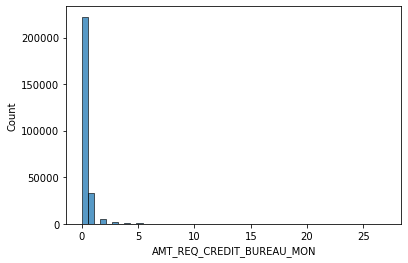

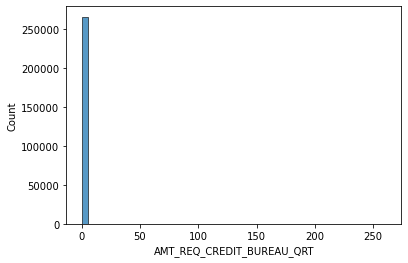

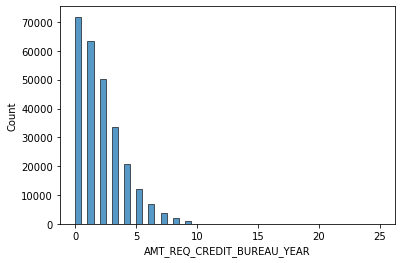

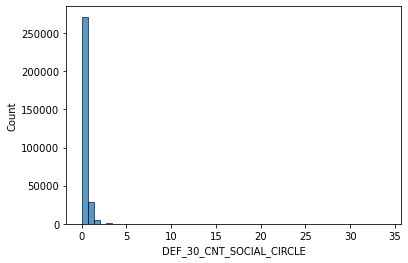

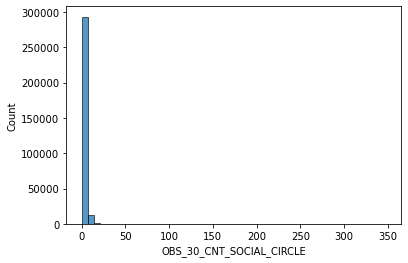

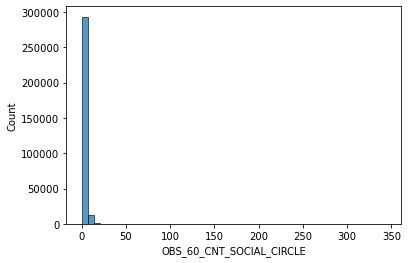

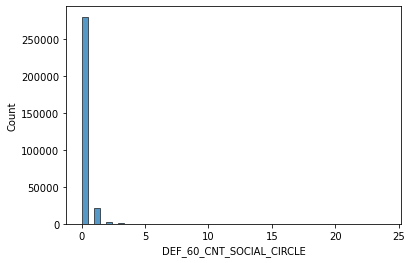

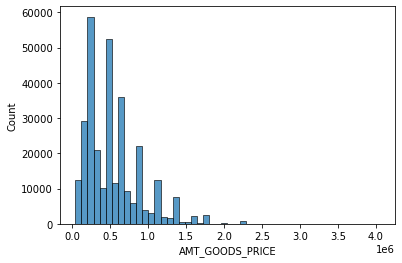

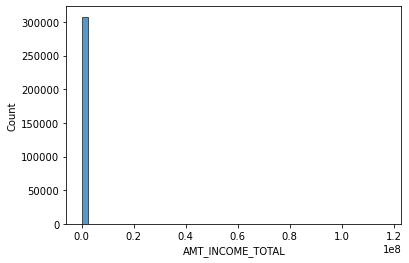

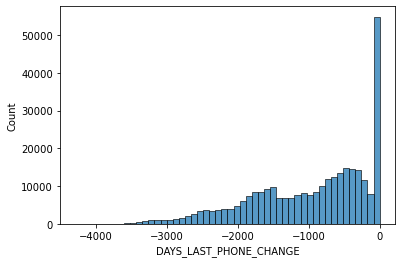

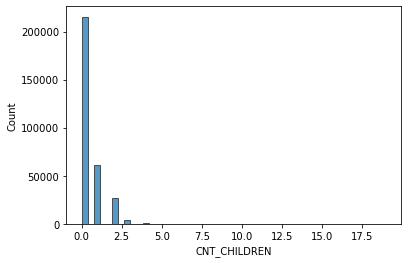

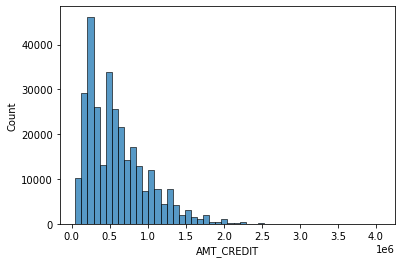

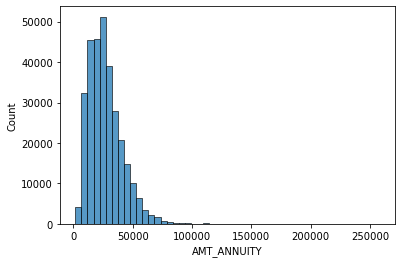

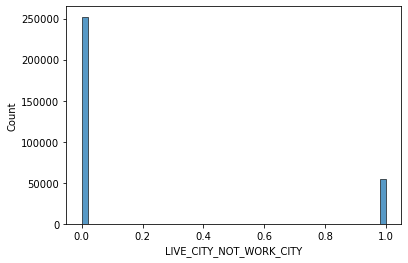

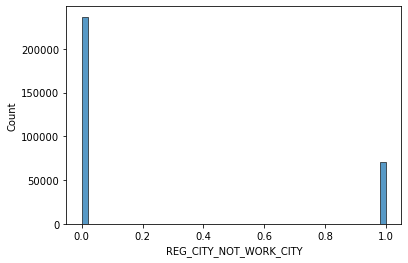

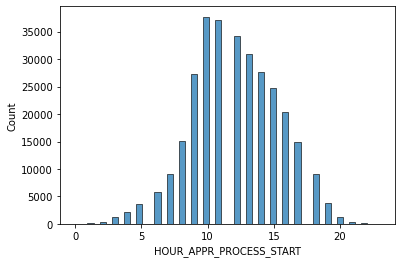

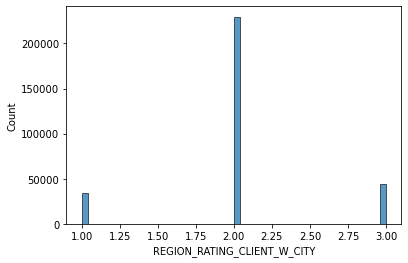

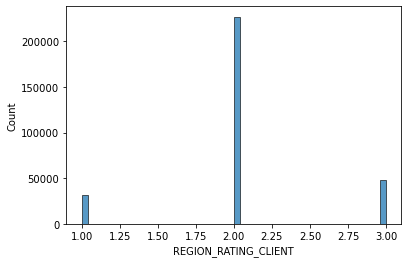

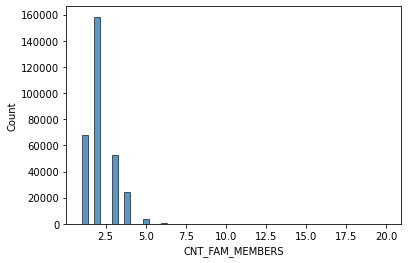

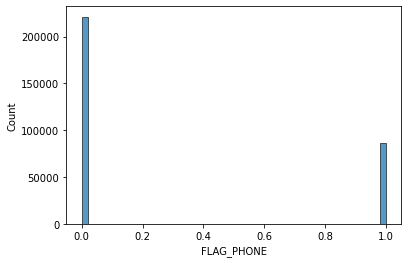

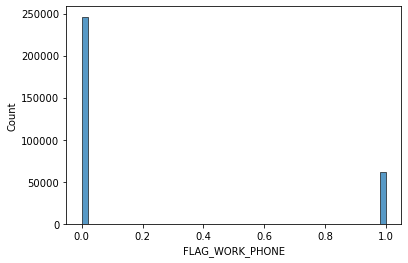

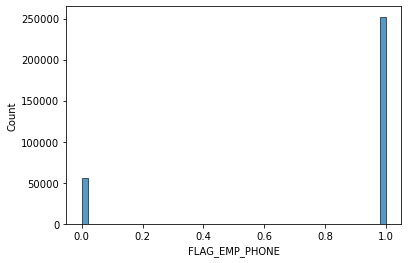

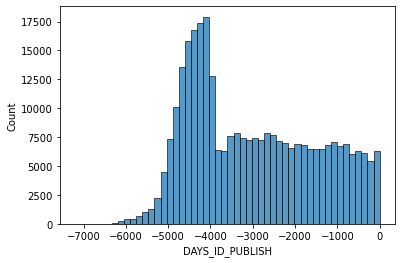

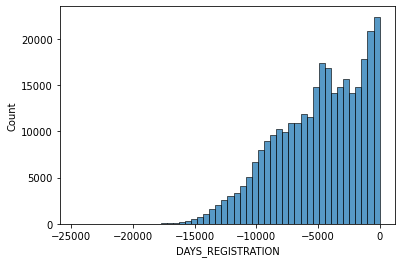

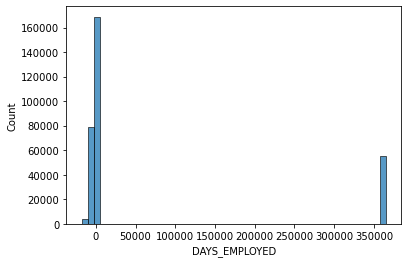

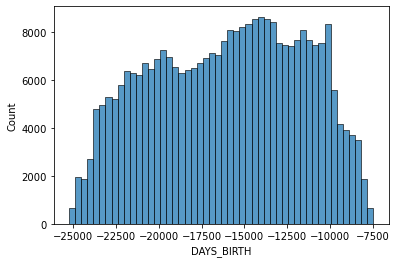

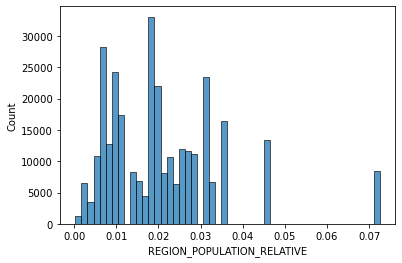

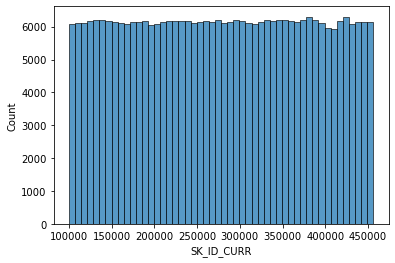

In [34]:
for col in X_data.select_dtypes(np.number):
    sns.histplot(x=X_data[col],bins=50)
    plt.show()

In [35]:
X_data.loc[(X_data.DAYS_EMPLOYED > 20000)]["DAYS_EMPLOYED"]

8         365243
11        365243
23        365243
38        365243
43        365243
           ...  
307469    365243
307483    365243
307487    365243
307505    365243
307507    365243
Name: DAYS_EMPLOYED, Length: 55374, dtype: int64

In [36]:
X_data.loc[(X_data.DAYS_EMPLOYED > 20000)]["OCCUPATION_TYPE"].value_counts(dropna=False,normalize=True)

NaN               0.999964
Cleaning staff    0.000036
Name: OCCUPATION_TYPE, dtype: float64

In [37]:
X_data.CODE_GENDER.value_counts(normalize=True)

F    0.658354
M    0.341646
Name: CODE_GENDER, dtype: float64

In [38]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307505 entries, 0 to 307510
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   OCCUPATION_TYPE              211116 non-null  object 
 1   AMT_REQ_CREDIT_BUREAU_MON    265987 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_QRT    265987 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_YEAR   265987 non-null  float64
 4   NAME_TYPE_SUITE              306215 non-null  object 
 5   DEF_30_CNT_SOCIAL_CIRCLE     306484 non-null  float64
 6   OBS_30_CNT_SOCIAL_CIRCLE     306484 non-null  float64
 7   OBS_60_CNT_SOCIAL_CIRCLE     306484 non-null  float64
 8   DEF_60_CNT_SOCIAL_CIRCLE     306484 non-null  float64
 9   AMT_GOODS_PRICE              307229 non-null  float64
 10  AMT_INCOME_TOTAL             307505 non-null  float64
 11  CODE_GENDER                  307505 non-null  object 
 12  FLAG_OWN_CAR                 307505 non-null  object 
 13 

### Supression des valeurs extremes

Suppression les individus avec des valeurs extremes dans la colonnes DAYS_EMPLOYED, ce qui va supprimer aussi une grandes partie des valeurs manquantes notemen dazns les colonnes ORGANIZATION_TYPE, OCCUPATION_TYPE

In [39]:
X_data = X_data.loc[(X_data.DAYS_EMPLOYED < 30000)]

<AxesSubplot:>

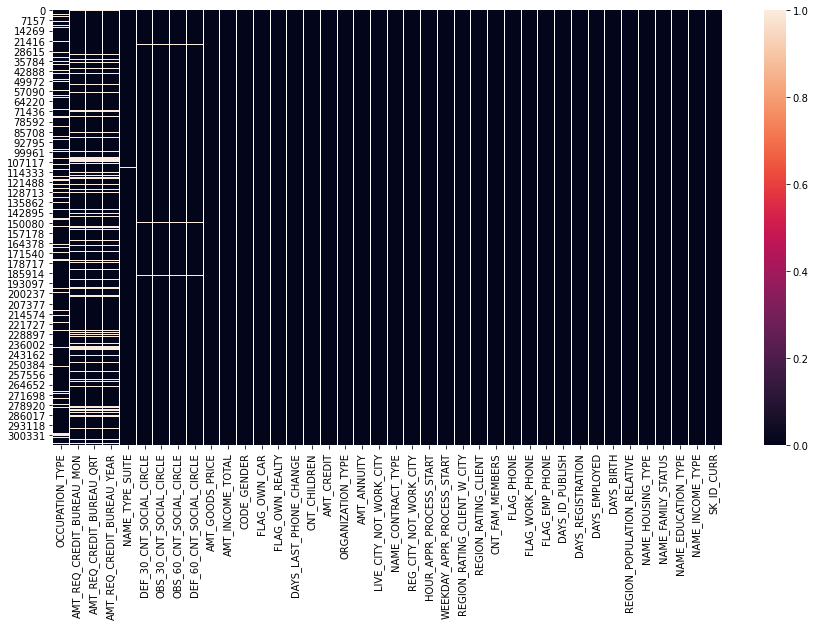

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(X_data.isna())

In [41]:
X_data.isna().sum()

OCCUPATION_TYPE                41017
AMT_REQ_CREDIT_BUREAU_MON      33855
AMT_REQ_CREDIT_BUREAU_QRT      33855
AMT_REQ_CREDIT_BUREAU_YEAR     33855
NAME_TYPE_SUITE                 1094
DEF_30_CNT_SOCIAL_CIRCLE         849
OBS_30_CNT_SOCIAL_CIRCLE         849
OBS_60_CNT_SOCIAL_CIRCLE         849
DEF_60_CNT_SOCIAL_CIRCLE         849
AMT_GOODS_PRICE                  254
AMT_INCOME_TOTAL                   0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
DAYS_LAST_PHONE_CHANGE             1
CNT_CHILDREN                       0
AMT_CREDIT                         0
ORGANIZATION_TYPE                  0
AMT_ANNUITY                       12
LIVE_CITY_NOT_WORK_CITY            0
NAME_CONTRACT_TYPE                 0
REG_CITY_NOT_WORK_CITY             0
HOUR_APPR_PROCESS_START            0
WEEKDAY_APPR_PROCESS_START         0
REGION_RATING_CLIENT_W_CITY        0
REGION_RATING_CLIENT               0
CNT_FAM_MEMBERS                    0
F

In [42]:
X_data.NAME_TYPE_SUITE.value_counts(dropna=False)

Unaccompanied      205015
Family              31658
Spouse, partner      9663
Children             2250
Other_B              1473
NaN                  1094
Other_A               762
Group of people       216
Name: NAME_TYPE_SUITE, dtype: int64

In [43]:
X_data.NAME_FAMILY_STATUS.value_counts(dropna=False)

Married                 163911
Single / not married     39316
Civil marriage           26196
Separated                16000
Widow                     6708
Name: NAME_FAMILY_STATUS, dtype: int64

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Count'>

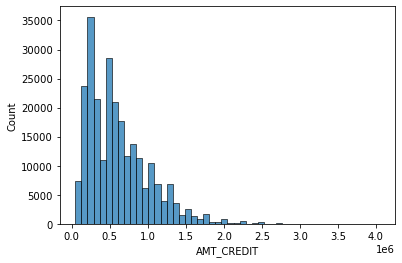

In [44]:
sns.histplot(X_data.AMT_CREDIT,bins=50)

In [45]:
X_data[["AMT_CREDIT","AMT_GOODS_PRICE"]].corr()

,AMT_CREDIT,AMT_GOODS_PRICE
AMT_CREDIT,1.000000,0.986453
AMT_GOODS_PRICE,0.986453,1.000000


In [46]:
col_to_drop = ["AMT_GOODS_PRICE", 
               "DEF_60_CNT_SOCIAL_CIRCLE", 
               "OBS_60_CNT_SOCIAL_CIRCLE", 
               "OBS_30_CNT_SOCIAL_CIRCLE", 
               "DEF_30_CNT_SOCIAL_CIRCLE",
               "AMT_REQ_CREDIT_BUREAU_YEAR",
               "AMT_REQ_CREDIT_BUREAU_QRT",
               "AMT_REQ_CREDIT_BUREAU_MON",
               "LIVE_CITY_NOT_WORK_CITY",
               "REGION_RATING_CLIENT_W_CITY",
               "CNT_FAM_MEMBERS"
              ]

In [47]:
X_data.drop(col_to_drop, axis=1, inplace=True)

<AxesSubplot:>

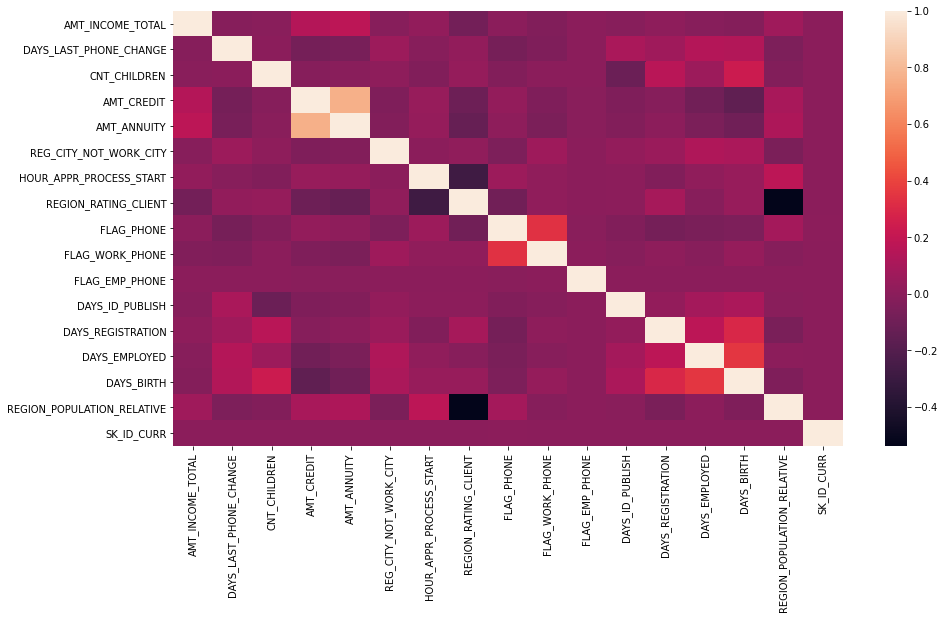

In [48]:
plt.figure(figsize=(15,8))
sns.heatmap(X_data.corr())

### Colonne NAME_TYPE_SUITE

In [49]:
X_data.NAME_TYPE_SUITE.value_counts(dropna=False)

Unaccompanied      205015
Family              31658
Spouse, partner      9663
Children             2250
Other_B              1473
NaN                  1094
Other_A               762
Group of people       216
Name: NAME_TYPE_SUITE, dtype: int64

In [50]:
X_data.NAME_TYPE_SUITE = X_data.NAME_TYPE_SUITE.replace(["Other_B", "Other_A", np.nan], value="Other")

In [51]:
X_data.isna().sum()

OCCUPATION_TYPE               41017
NAME_TYPE_SUITE                   0
AMT_INCOME_TOTAL                  0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
DAYS_LAST_PHONE_CHANGE            1
CNT_CHILDREN                      0
AMT_CREDIT                        0
ORGANIZATION_TYPE                 0
AMT_ANNUITY                      12
NAME_CONTRACT_TYPE                0
REG_CITY_NOT_WORK_CITY            0
HOUR_APPR_PROCESS_START           0
WEEKDAY_APPR_PROCESS_START        0
REGION_RATING_CLIENT              0
FLAG_PHONE                        0
FLAG_WORK_PHONE                   0
FLAG_EMP_PHONE                    0
DAYS_ID_PUBLISH                   0
DAYS_REGISTRATION                 0
DAYS_EMPLOYED                     0
DAYS_BIRTH                        0
REGION_POPULATION_RELATIVE        0
NAME_HOUSING_TYPE                 0
NAME_FAMILY_STATUS                0
NAME_EDUCATION_TYPE               0
NAME_INCOME_TYPE            

<AxesSubplot:>

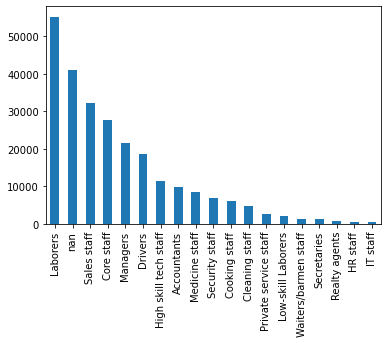

In [134]:
X_data.OCCUPATION_TYPE.value_counts(dropna=False).plot.bar()

In [114]:
def fill_NaNs_in_occupation_type(row):
    if pd.isnull(row['OCCUPATION_TYPE']):
        organization_type = row['ORGANIZATION_TYPE']
        return X_data[X_data['ORGANIZATION_TYPE']==organization_type].OCCUPATION_TYPE.value_counts().first_valid_index()
    else:
        return row['OCCUPATION_TYPE']

In [129]:
tqdm.pandas()

In [130]:
occupation_filled_nan = X_data.progress_apply(lambda row: fill_NaNs_in_occupation_type(row), axis=1)

100%|██████████| 252131/252131 [21:11<00:00, 198.29it/s]


<AxesSubplot:>

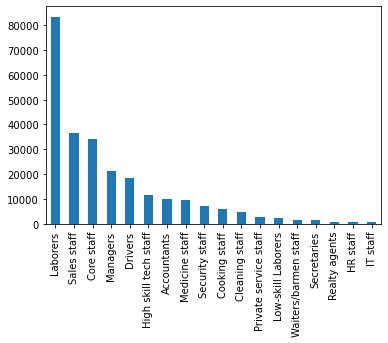

In [135]:
occupation_filled_nan.value_counts(dropna=False).plot.bar()

In [136]:
X_data.OCCUPATION_TYPE = occupation_filled_nan

In [138]:
X_data.dropna(inplace=True)

In [141]:
target = target.loc[X_data.index]

In [142]:
X_data.to_csv("X_data.csv")
target.to_csv("target.csv")

In [144]:
target.value_counts(normalize=True)

0    0.913394
1    0.086606
Name: TARGET, dtype: float64